---

### Question 1

In [1]:
import numpy as np
import pandas as pd

# DDE to PCB ratios
terrestrial = pd.Series([76.5,6.03,3.51,9.96,4.24,7.74,9.54,41.7,1.84,2.5,1.64])
aquatic = pd.Series([.27,.61,.54,.14,.63,.23,.56,.48,.16,.18])

df = pd.DataFrame({'terrestrial' : terrestrial, 'aquatic' : aquatic})

####1a. Compute mean and median for 21 data points, ignoring type of feeder

In [2]:
combined = pd.concat([df["aquatic"], df["terrestrial"]])
print "Combined mean: %s" % combined.mean()
print "Combined median: %s" % combined.median()

Combined mean: 8.04761904762
Combined median: 1.64


####1b. Compute mean and median separately for each type

In [3]:
print "Aquatic mean: %s" % df["aquatic"].mean()
print "Aquatic median: %s" % df["aquatic"].median()

print "Terrestrial mean: %s" % df["terrestrial"].mean()
print "Terrestrial median: %s" % df["terrestrial"].median()

Aquatic mean: 0.38
Aquatic median: 0.375
Terrestrial mean: 15.0181818182
Terrestrial median: 6.03


####1c. Comment on the relative sensitivity of the mean and median to extreme values in a data set

In [4]:
# trimming out 2 large values from terrestrial group
df.terrestrial[df.terrestrial < 40].mean()

5.2222222222222223

The results show that the mean is more sensitive to extreme values than the median. I think it's most apparent when looking at the terrestrial values where the mean is ~15 and the median is ~6. Two large values sway the mean. If we took the mean without those two large values, the mean of the terrestrial data would be 5.22. 

####1d. Comment on the appropriateness of using mean and median as measure of central location for DDE to PCB ratio for two types of feeders.

I think that for the terrestrial group, the appropriate measure would be the median since the mean was swayed significantly by two larger values. For the aquatic group, either one would work since they are similar and the data is fairly evenly distributed.

####1e. Compute a measure of dispersion for the two types of feeder separately that is resistant

In [5]:
import mycode as m
#importing mycode because Minitab's algorithm for quartiles does not 
#exist in python. Had to implement myself

q_low = m.quartile(df.aquatic, 1)
q_high = m.quartile(df.aquatic, 3)
aquatic_iqr = q_high - q_low

q_low = m.quartile(df.terrestrial, 1)
q_high = m.quartile(df.terrestrial, 3)
terrestrial_iqr = q_high - q_low

print "Aquatic IQR: %s" % aquatic_iqr
print "Terrestrial IQR: %s" % terrestrial_iqr

Aquatic IQR: 0.3975
Terrestrial IQR: 7.46


####1f. Compute a measure of dispersion for the two types of feeder separately that is non resistant

In [6]:
print "Aquatic range: %s" % (df.aquatic.max() - df.aquatic.min())
print "Terrestrial range: %s" % (df.terrestrial.max() - df.terrestrial.min())

Aquatic range: 0.49
Terrestrial range: 74.86


---
###Question 2

####2a. When the data set has some extreme outliers, can we trim some of the data and use the trimmed data set to carry out analysis to make inference about the central location? 

Section 3.4 of the book says that by trimming the data we can get a more reliable measure of the central value. It then goes on to say that this is particularly important when the sample mean is used to predict the population central value. So the answer to the question is yes, trimming some of the data can be used to make inference about the central location. I think there are some caveats to this and one needs to be mindful about the data they are excluding. I think it's very possible that your data might be bimodal and you may be discarding evidence of that second mound if you don't have enough samples.

#### 2b. When the data set has some extreme outliers, can we trim some of the data and use the trimmed data set to carry out analysis to make inference about the dispersion of the population? 

I think it's possible to make meaningful observations about the dispersion of the data using a trimmed data set. The boxplot is a great way to visualize the variability of the data and it identifies the potential outliers that are outside of the lower/upper limits.

I want to distinguish between "observations" and "carrying out analysis/make inferences". What I stated above is that using a boxplot, you can exclude outliers and still make meaningul observations. But I think that by trimming data, which significantly alters the standard deviation, you can't make any inferences about the population. 

I think the main difference between using trimmed data for inferring central location versus using trimmed data for inferring variability is that central location has other measures that you can use to validate the trimmed mean. You can compare it to the original median or mode to validate the impact of the trimming. But you don't have that safety net when using trimmed data for analyzing variability.

---
###Question 3

In [7]:
supplier_1 = pd.Series([189.9,191.9,190.9,183.8,185.5,190.9,192.8,188.4,187.0])
supplier_2 = pd.Series([158.6,156.4,157.7,154.1,152.3,159.5,158.1,150.9,156.9])
supplier_3 = pd.Series([218.6,208.4,187.1,199.5,202.0,211.1,197.6,204.4,206.8])

suppliers = pd.DataFrame({"supplier_1":supplier_1, 
                          "supplier_2":supplier_2, 
                          "supplier_3":supplier_3})

####3a. Compute mean and standard deviation for each supplier

In [8]:
print "Supplier 1: mean: %s, std dev: %s" % 
        (suppliers.supplier_1.mean(), suppliers.supplier_1.std())
print "Supplier 2: mean: %s, std dev: %s" % 
        (suppliers.supplier_2.mean(), suppliers.supplier_2.std())
print "Supplier 3: mean: %s, std dev: %s" % 
        (suppliers.supplier_3.mean(), suppliers.supplier_3.std())

Supplier 1: mean: 189.011111111, std dev: 3.05223051409
Supplier 2: mean: 156.055555556, std dev: 2.96989524694
Supplier 3: mean: 203.944444444, std dev: 8.95629821845


####3b. Plot the data

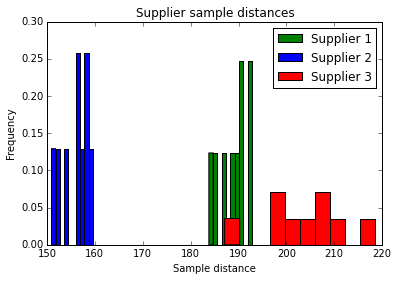

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist(suppliers.supplier_1, label='Supplier 1', normed=True, color='g')
plt.hist(suppliers.supplier_2, label='Supplier 2', normed=True, color='b')
plt.hist(suppliers.supplier_3, label='Supplier 3', normed=True, color='r')
plt.title("Supplier sample distances")
plt.xlabel("Sample distance")
plt.ylabel("Frequency")
plt.legend()

plt.show()

####3c. Which supplier appears to provide material that produces lenses having power closest to the target value?

If I understood the question correctly, these values are distances from a target which means that Supplier 2 is clearly the winner since their distances are the lowest of the 3. The data suggests that on average, Supplier 2 is about 156 units away from their target whereas Suppliers 1 and 3 are about 189 and 204 units away from their target, respectively. 

---
###Question 4

In [10]:
df = pd.DataFrame({"demands": pd.Series([28,50,193,65,4,7,147,76,10,0,10,
                                         84,0,9,1,0,62,26,15,226,54,46,108,
                                         4,105,40,4,273,184,7,55,41,26,6])})

####4a. Calculate mean and median for the data

In [11]:
mean = df.demands.mean()
median = df.demands.median()
print "Mean: %s" % mean
print "Median: %s" % median

Mean: 57.8235294118
Median: 34.0


####4b. Which measure appears to best represent the center of the data?

In this case, I think the median is a better measure of the center of the data since it is a resistant measure and this data is skewed right by a few extreme values.

####4c. Calculate range and standard deviation.

In [12]:
dfRange = df.demands.max() - df.demands.min()
stdDev = df.demands.std()
print "Range: %s" % dfRange
print "Standard dev: %s" % stdDev

Range: 273
Standard dev: 70.6873057003


####4d. Use range to estimate std dev. How close is the approximation?

In [13]:
print "Standard dev approximation: %s" % (dfRange / 4.)

Standard dev approximation: 68.25


The approximation is actually pretty close to the true value. It's off by about 2.5 units (about 4%)

####4e. Construct intervals for $\bar{y} \pm 1s, \bar{y} \pm 2s, \bar{y} \pm 3s$, count number of data falling in each interval, convert to percentages and compare with Empirical Rule.

In [14]:
output = "[{0[0]}, {0[1]}]: {1} items => {2:.2f}%" #output format string

firstInt = (mean - stdDev, mean + stdDev)
firstIntValues = df[(df.demands >= firstInt[0]) & (df.demands <= firstInt[1])]
firstCount = len(firstIntValues)
firstPercentage = 100.0 * firstCount / len(df)
print output.format(firstInt, firstCount, firstPercentage)

secondInt = (mean - 2*stdDev, mean + 2*stdDev)
secondIntValues = df[(df.demands >= secondInt[0]) & (df.demands <= secondInt[1])]
secondCount = len(secondIntValues)
secondPercentage = 100.0 * secondCount / len(df)
print output.format(secondInt, secondCount, secondPercentage)

thirdInt = (mean - 3*stdDev, mean + 3*stdDev)
thirdIntValues = df[(df.demands >= thirdInt[0]) & (df.demands <= thirdInt[1])]
thirdCount = len(thirdIntValues)
thirdPercentage = 100.0 * thirdCount / len(df)
print output.format(thirdInt, thirdCount, thirdPercentage)

[-12.8637762885, 128.510835112]: 29 items => 85.29%
[-83.5510819888, 199.198140812]: 32 items => 94.12%
[-154.238387689, 269.885446513]: 33 items => 97.06%


####4f. Why do you think the Empirical Rule and your percentages do not match well?

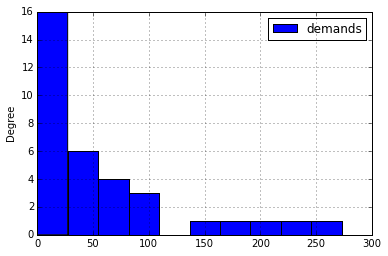

In [15]:
df.plot(kind='hist')

The empirical rule percentages did not match well with the percentages above because, as the histogram of the data shows, it is not evenly distributed. It has a large concentration of values on one side of the distribution and a few extreme outliers to the right. For this reason, over 85% of the values were within one standard deviation of the mean. 

---
### Question 5

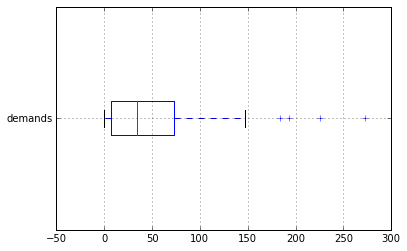

In [16]:
df.plot(kind='box', vert=False, xlim=(-50,300))

####5a. Is the data left-skewed, symmetric or right-skewed?

The data is right-skewed as shown in Lesson 2.3. The box is longer towards the right, and the line from the 3rd quartile to the upper adjacent value is longer.

####5b. What are the outliers?

The potential outliers are the values greater than 147: [ 184, 193, 226,  273 ]

####5c. Is the median closer to the lower quartile or the upper quartile? Does that indicate that the density of data between first quartile and the median is higher than the density of data between the median and the third quartile?

For this data, the median is closer to the lower quartile. In this scenario, there is a difference in density. There are many more points between the first quartile and the median than between the median and the third quartile. We can see that corroborated by the histogram above. However, I don't think that the median being closer to the lower quartile necessarily indicates that. It could also be a result of how sparse the data points are, especially with fewer samples.

---
###Question 6

In [17]:
paperTowelData = pd.read_csv('hw2_paperTowelData.csv', index_col=None)
pricePerRoll = paperTowelData['Price per Roll']
pricePerSheet = paperTowelData['Price per Sheet']

####6a. Compute standard deviation for both price per roll and price per sheet.

In [18]:
print "Price per roll std dev: %s" % pricePerRoll.std()
print "Price per sheet std dev: %s" % pricePerSheet.std()

Price per roll std dev: 0.423304589347
Price per sheet std dev: 0.00553029698864


#### 6b. Which is more variable, price per roll or price per sheet? Should you use $s$ (standard deviation) or $CV$ (Coefficient of Variation)?

In [19]:
perRollCV = pricePerRoll.std() / pricePerRoll.mean()
perSheetCV = pricePerSheet.std() / pricePerSheet.mean()

print "Price per roll CV: %.2f%%" % (perRollCV * 100)
print "Price per sheet CV: %.2f%%" % (perSheetCV * 100)


Price per roll CV: 46.03%
Price per sheet CV: 48.78%


Although the price per roll has a higher standard deviation, the price per sheet has a higher CV, which indicates that the price per sheet has greater variability relative to the magnitude of it's mean.

#### 6c. Do you think that IQR is a good measure to compare the variability of these two variables?

I think that IQR would be just as poor as standard deviation for comparing variability since both of those measures are in the same units as the data. That makes it difficult to compare across data sets.

---
### Question 7

In [20]:
singerData = pd.read_csv('hw2_singers.csv')
basses = singerData['Bass']
sopranos = singerData['Soprano']
altos = singerData['Alto']
tenors = singerData['Tenor']

#### 7a. Find descriptive statistics for each type of singer. For each case, does the approximate value of $s$ give a good estimate of $s$?

In [21]:
print "Bass singers: \n%s\n" % basses.describe()
print "Alto singers: \n%s\n" % altos.describe()
print "Soprano singers: \n%s\n" % sopranos.describe()
print "Tenor singers: \n%s\n" % tenors.describe()

Bass singers: 
count    36.000000
mean     70.750000
std       2.430461
min      66.000000
25%      69.000000
50%      71.000000
75%      72.000000
max      75.000000
Name: Bass, dtype: float64

Alto singers: 
count    35.000000
mean     64.885714
std       2.794653
min      60.000000
25%      63.000000
50%      65.000000
75%      66.500000
max      72.000000
Name: Alto, dtype: float64

Soprano singers: 
count    39.000000
mean     64.717949
std       2.459661
min      60.000000
25%      63.000000
50%      65.000000
75%      66.000000
max      72.000000
Name: Soprano, dtype: float64

Tenor singers: 
count    20.000000
mean     69.150000
std       3.216323
min      64.000000
25%      66.750000
50%      68.500000
75%      71.250000
max      76.000000
Name: Tenor, dtype: float64



In [22]:
print "Bass approx s: %s" % ((basses.max() - basses.min()) / 4.)
print "Alot approx s: %s" % ((altos.max() - altos.min()) / 4.)
print "Soprano approx s: %s" % ((sopranos.max() - sopranos.min()) / 4.)
print "Tenor approx s: %s" % ((tenors.max() - tenors.min()) / 4.)

Bass approx s: 2.25
Alot approx s: 3.0
Soprano approx s: 3.0
Tenor approx s: 3.0


Comparing the approximate values of $s$ to the actual values of $s$, they appear to be fair estimates. I think they are close enough to be useful for getting an idea of the variability of the data sets. The soprano estimate seems to be the most off by about 22%.  

#### 7b. Draw boxplots side by side for these cases. Comment on the central tendency and the dispersion for the four types of singers.

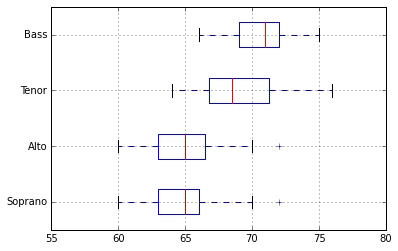

In [23]:
singerData.plot(kind='box', vert=False, xlim=(55,80))

With regard to central tendency, the means are very close to the medians. With the exception of the tenor data (which looks a little skewed right), the data looks very evenly distributed. 